## Observations and Insights

1.  Based on the correlation coefficient, Mouse weight and average tumor size are strongly correlated, with a value of .84, meaning that larger mice have larger tumors (at least for the capomulin treatment) which makes logical sense.  

2.  Mice in the Infubinol and Ceftamin regimen appeared to have larger final tumor size, which could indicate that these treatments were not as effective as the Capomulin and Ramicane treatment groups.  HOwver, without further analysis into the average change of each treatments tumor size from the initial size, making a definitive conclusion is not possible.  The effectivness of treatment should be based on overall tumor change, not on just final size, as initial tumor volume does vary as well. 

3.  For the Capomulin Treatment over time, the tumor shrunk ~8.2mm3 in the first 10 days of treatment, and then 8.4mm3 over the remaining 35 days, which indicates the treatment is most effective in the initial days of the regimen, before leveling off to a more consistent decline of tumor size.  If other regimens also show similar initial response, may be effective to cycle the different regimens ~every 10 days to increase rate of tumor shrinking. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])

complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group the data by the drug regimen
small_group = complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

#mean creation
mean_df = small_group.mean()
mean_df = pd.DataFrame(mean_df)
#mean_df

#median creation
median_df = small_group.median()
median_df = pd.DataFrame(median_df)
#median_df

#variance creation
variance_df = small_group.var()
variance_df = pd.DataFrame(variance_df)
#variance_df

#Standard deviation creation
stddev_df = small_group.std()
stddev_df = pd.DataFrame(stddev_df)
#stddev_df

#SEM Creation
sem_df = small_group.sem()
sem_df = pd.DataFrame(sem_df)
#sem_df

#merging of df to one table, found on stackoverflow, link:https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
data_frames = [mean_df, median_df, variance_df, stddev_df, sem_df]
summ_df = pd.concat(data_frames, join='outer', axis=1)
summ_df.columns = ["Mean TV", "Median TV", "TV Variance", "TV StdDev", "TV SEM"]
summ_df








,Mean TV,Median TV,TV Variance,TV StdDev,TV SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

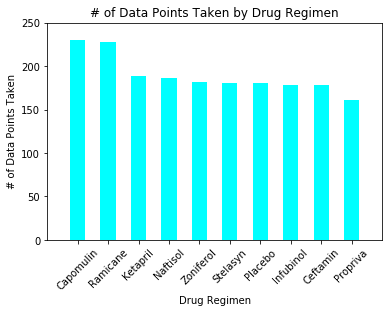

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#create df 
data_points_df = pd.DataFrame(complete_data['Drug Regimen'].value_counts())
#plot the dataframe and format the plot
data_points_df.plot.bar(y = 'Drug Regimen', width = 0.5, color = 'aqua')
plt.title("# of Data Points Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Data Points Taken")
plt.xlim(-1,10)
plt.ylim(0,250)
plt.legend().set_visible(False)
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

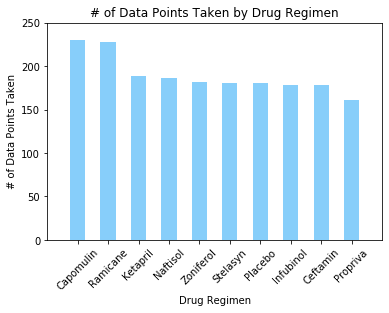

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(data_points_df.index, data_points_df['Drug Regimen'], width = 0.5, color = 'lightskyblue')
plt.title("# of Data Points Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Data Points Taken")
plt.xlim(-1,10)
plt.ylim(0,250)
plt.xticks(rotation = 45)

## Pie plots

Text(0, 0.5, ' ')

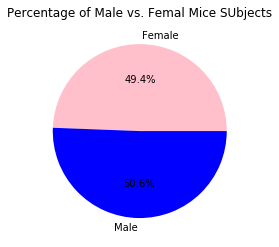

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#group the data by gender
gender_df = complete_data.groupby(['Sex'])['Mouse ID'].count()
#create the plot
pie_plot = gender_df.plot.pie(autopct="%1.1f%%", startangle=0, colors=['pink', 'b'])
plt.title("Percentage of Male vs. Femal Mice SUbjects")
plt.ylabel(' ')

Text(0.5, 1.0, 'Percentage of Male vs. Femal Mice SUbjects')

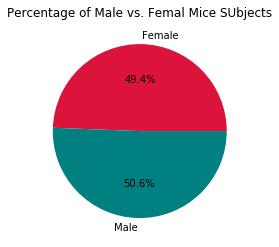

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels = gender_df.index, autopct="%1.1f%%", startangle=0, colors=['crimson', 'teal'])
plt.title("Percentage of Male vs. Femal Mice SUbjects")

## Quartiles, outliers and boxplots

Tumor Volume of Top 4 Treatments

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#dataframe for the 4 called drug regimens
top_4_df = complete_data[(complete_data['Drug Regimen'] == 'Capomulin') | (complete_data['Drug Regimen'] == 'Ramicane') |
                 (complete_data['Drug Regimen'] == 'Infubinol')| (complete_data['Drug Regimen'] == 'Ceftamin')]

#dataframe group for the last (aka max) timepoint of the 4 drugs
final_time = top_4_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
final_time_df = pd.DataFrame(final_time)

#merge the two dfs to get the tumor size at last timepoint
final_size_df = top_4_df.merge(final_time_df, on = ['Drug Regimen', 'Mouse ID', 'Timepoint'], how = 'inner')
final_size_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


Capomulin Quartiles, IQR, and Ouliers

In [9]:
#set up the capomulin dataframe 
capo_df = final_size_df[(final_size_df['Drug Regimen'] == 'Capomulin')]

#set the quartile ranges
capo_quart = capo_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = capo_quart[0.25]
upperq = capo_quart[0.75] 
iqr = upperq-lowerq

#print statements
print(f"Capomulin Final Tumor size, lower quartile: {lowerq}")
print(f"Capomulin Final Tumor size, upper quartile: {upperq}")
print(f"Capomulin Interquartile Range: {iqr}")
print(f"Capomulin Median Final Tumor Size: {capo_quart[0.5]} ")

#find potential outlier ranges
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print outlier statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#calculate and find outliers and also print
capo_outlier = capo_df[(capo_df['Tumor Volume (mm3)'] < lower_bound) | (capo_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(capo_outlier)} outliers in the Capomulin Subjects.")

Capomulin Final Tumor size, lower quartile: 32.37735684
Capomulin Final Tumor size, upper quartile: 40.1592203
Capomulin Interquartile Range: 7.781863460000004
Capomulin Median Final Tumor Size: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are 0 outliers in the Capomulin Subjects.


Ramicane Quartiles, IQR, and Ouliers

In [10]:
#set up the ramicane dataframe 
ram_df = final_size_df[(final_size_df['Drug Regimen'] == 'Ramicane')]

#set the quartile ranges
ram_quart = ram_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = ram_quart[0.25]
upperq = ram_quart[0.75] 
iqr = upperq-lowerq

#print statements
print(f"Ramicane Final Tumor size, lower quartile: {lowerq}")
print(f"Ramicane Final Tumor size, upper quartile: {upperq}")
print(f"Ramicane Interquartile Range: {iqr}")
print(f"Ramicane Median Final Tumor Size: {ram_quart[0.5]} ")

#find potential outlier ranges
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print outlier statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#calculate and find outliers and also print
ram_outlier = ram_df[(ram_df['Tumor Volume (mm3)'] < lower_bound) | (ram_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(ram_outlier)} outliers in the Ramicane Subjects.")

Ramicane Final Tumor size, lower quartile: 31.56046955
Ramicane Final Tumor size, upper quartile: 40.65900627
Ramicane Interquartile Range: 9.098536719999998
Ramicane Median Final Tumor Size: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are 0 outliers in the Ramicane Subjects.


Infubinol Quartiles, IQR, and Ouliers 

In [11]:
#set up the infubinol dataframe 
inf_df = final_size_df[(final_size_df['Drug Regimen'] == 'Infubinol')]

#set the quartile ranges
inf_quart = inf_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = inf_quart[0.25]
upperq = inf_quart[0.75] 
iqr = upperq-lowerq

#print statements
print(f"Infubinol Final Tumor size, lower quartile: {lowerq}")
print(f"Infubinol Final Tumor size, upper quartile: {upperq}")
print(f"Infubinol Interquartile Range: {iqr}")
print(f"Infubinol Median Final Tumor Size: {inf_quart[0.5]} ")

#find potential outlier ranges
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print outlier statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#calculate and find outliers and also print
inf_outlier = inf_df[(inf_df['Tumor Volume (mm3)'] < lower_bound) | (inf_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(inf_outlier)} outliers in the Infubinol Subjects.")

Infubinol Final Tumor size, lower quartile: 54.04860769
Infubinol Final Tumor size, upper quartile: 65.52574285
Infubinol Interquartile Range: 11.477135160000003
Infubinol Median Final Tumor Size: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
There are 1 outliers in the Infubinol Subjects.


Ceftamin Quartiles, IQR, and Ouliers 

In [12]:
#set up the Ceftamin dataframe 
cef_df = final_size_df[(final_size_df['Drug Regimen'] == 'Ceftamin')]

#set the quartile ranges
cef_quart = cef_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = cef_quart[0.25]
upperq = cef_quart[0.75] 
iqr = upperq-lowerq

#print statements
print(f"Ceftamin Final Tumor size, lower quartile: {lowerq}")
print(f"Ceftamin Final Tumor size, upper quartile: {upperq}")
print(f"Ceftamin Interquartile Range: {iqr}")
print(f"Ceftamin Median Final Tumor Size: {cef_quart[0.5]} ")

#find potential outlier ranges
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print outlier statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#calculate and find outliers and also print
cef_outlier = cef_df[(cef_df['Tumor Volume (mm3)'] < lower_bound) | (cef_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(cef_outlier)} outliers in the Ceftamin Subjects.")

Ceftamin Final Tumor size, lower quartile: 48.72207785
Ceftamin Final Tumor size, upper quartile: 64.29983003
Ceftamin Interquartile Range: 15.577752179999997
Ceftamin Median Final Tumor Size: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are 0 outliers in the Ceftamin Subjects.


Box Plot Comparison of the 4 Most Promising Drug Regimen's

Text(0.5, 1.0, "Comparison of Final Tumor Sizes Amongst 4 Most Promising Drug Regimen's ")

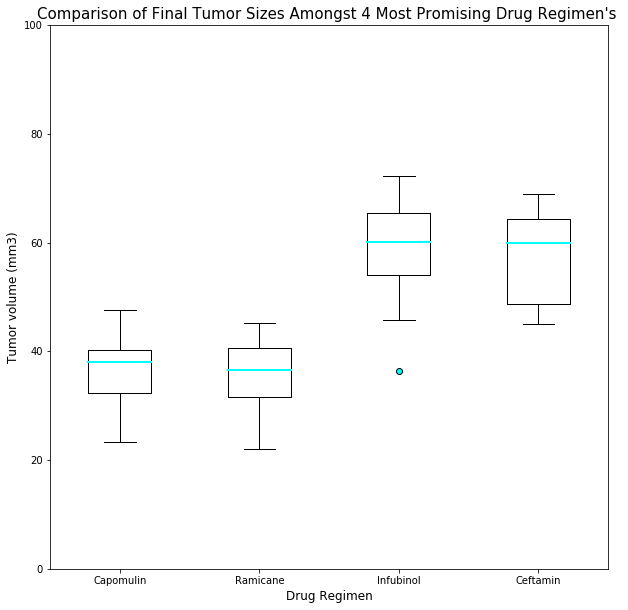

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#data frames:: capo_df, ram_df, inf_df, and cef_df
#identify the data frames to be plotted 
box_data = [capo_df['Tumor Volume (mm3)'], ram_df['Tumor Volume (mm3)'], inf_df['Tumor Volume (mm3)'], cef_df['Tumor Volume (mm3)']]

#setup the plot; outlier marks,median lines, figure setup, format axes, labels, etc. 
outliers = dict(markerfacecolor = 'aqua', marker = 'o')
medians = dict(linestyle = '-', linewidth = 2, color = 'aqua')
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot()
box_plot = axes.boxplot(box_data, flierprops = outliers, medianprops = medians)
plt.ylim(0,100)
plt.yticks(fontsize = '10')
plt.xticks(range(1,5), labels = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin"), fontsize = '10')
plt.ylabel("Tumor volume (mm3)", fontsize = '12')
plt.xlabel("Drug Regimen", fontsize = '12')
plt.title("Comparison of Final Tumor Sizes Amongst 4 Most Promising Drug Regimen's ", fontsize = '15')


## Line and scatter plots

Data From Mouse ID m601

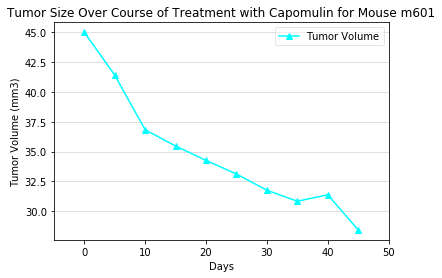

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#pull out the specific m601 data from the complete df
m601_data = complete_data[(complete_data['Drug Regimen'] == 'Capomulin') & (complete_data['Mouse ID'] == 'm601')]


#create line plot 
plt.plot(m601_data['Timepoint'], m601_data['Tumor Volume (mm3)'], label = "Tumor Volume", color = 'aqua', marker = '^')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Size Over Course of Treatment with Capomulin for Mouse m601')
plt.xlim(-5,50)
plt.legend(framealpha = 0.5, loc = 'best')
plt.grid(b = None, which = 'major', axis = 'y', alpha = 0.5)

In [15]:
m601_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


All Mouse Weights vs. Tumor Size 

(32, 47)

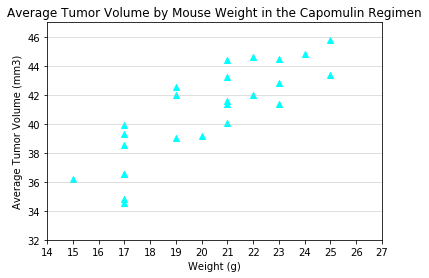

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#get a dataframe for all mouse weights in the capomulin regimen
capo_weight = complete_data[complete_data['Drug Regimen'] == 'Capomulin']

#group the data by tumor size and mouse weights
capo_group = capo_weight.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()

#assign the weights and create average tumor size 
mouse_weight = capo_group['Weight (g)']
avg_tumor = capo_group['Tumor Volume (mm3)']

#create the scatter plot
plt.scatter(mouse_weight, avg_tumor, color = 'aqua', marker = '^') 
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume by Mouse Weight in the Capomulin Regimen")
plt.xticks(range(10,30))
plt.grid(b = None, which = 'major', axis = 'y', alpha = 0.5)
plt.xlim(14,27)
plt.ylim(32,47)

The Correlation Between Mouse Weight and Average Tumor Size is 0.8419363424694717
The Equation for the Linear Regression Line is y=0.954x+21.552


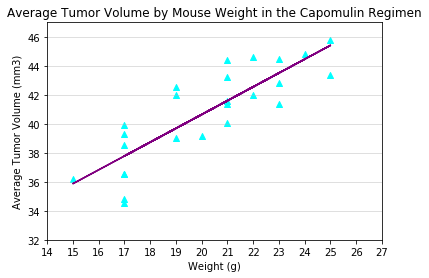

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#correlation coeffecient
corr_coeff = st.pearsonr(mouse_weight, avg_tumor)
print(f"The Correlation Between Mouse Weight and Average Tumor Size is {corr_coeff[0]}")

#linear regression 
#import the linregress module 
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor)
values = (mouse_weight)*(slope) + intercept
equation = "y=" + str(round(slope,3)) + "x+" + str(round(intercept,3))

#repeat scatterplot above but add in the regression line and display equation
capo_weight = complete_data[complete_data['Drug Regimen'] == 'Capomulin']
capo_group = capo_weight.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()
mouse_weight = capo_group['Weight (g)']
avg_tumor = capo_group['Tumor Volume (mm3)']
plt.scatter(mouse_weight, avg_tumor, color = 'aqua', marker = '^') 
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume by Mouse Weight in the Capomulin Regimen")
plt.xticks(range(10,30))
plt.grid(b = None, which = 'major', axis = 'y', alpha = 0.5)
plt.xlim(14,27)
plt.ylim(32,47)
plt.plot(mouse_weight, values, "-", color = 'purple')
print(f"The Equation for the Linear Regression Line is {equation}")